## EDA With Python

Customer Churn Datasets

Source: https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset

I'll be using this dataset to practice and showcase EDA with Python :)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r'D:\Datasets\customer_churn_dataset-testing-master.csv')

## Light exploration and check for missing / duplicated value

In [19]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [22]:
df.tail()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
64369,64370,45,Female,33,12,6,21,Basic,Quarterly,947,14,1
64370,64371,37,Male,6,1,5,22,Standard,Annual,923,9,1
64371,64372,25,Male,39,14,8,30,Premium,Monthly,327,20,1
64372,64373,50,Female,18,19,7,22,Standard,Monthly,540,13,1
64373,64374,52,Female,45,15,9,25,Standard,Monthly,696,22,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


Findings:
- There are 11 columns and 64373 rows in the data
- No missing values detected
- Variables data type seems aligned

In [17]:
df.duplicated().sum()

0

Findings:
- No duplicated values detected

## Statistical Analysis

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,64374.0,32187.500000,18583.317451,1.0,16094.25,32187.5,48280.75,64374.0
Age,64374.0,41.970982,13.924911,18.0,30.00,42.0,54.00,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.00,33.0,47.00,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.00,15.0,23.00,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.00,6.0,8.00,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.00,19.0,25.00,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.00,534.0,768.00,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.00,15.0,23.00,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.00,0.0,1.00,1.0


In [20]:
df.describe(include=['O']).T

,count,unique,top,freq
Gender,64374,2,Female,34353
Subscription Type,64374,3,Standard,21502
Contract Length,64374,3,Monthly,22130


## Univariate Analysis

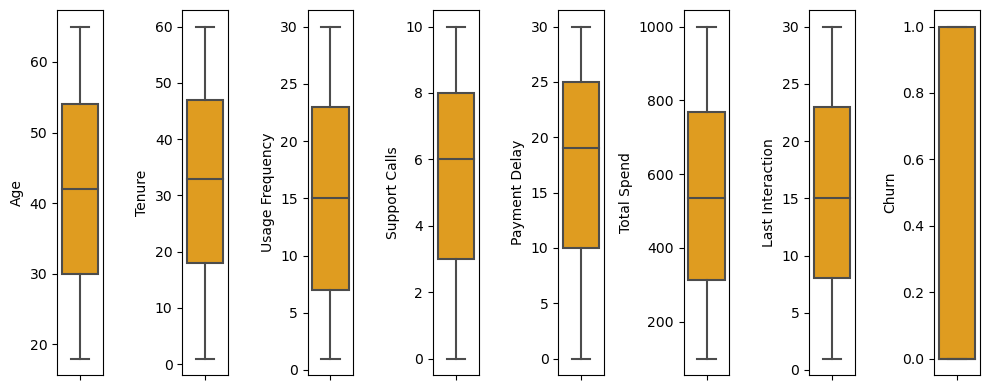

In [59]:
numericals = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn']

plt.figure(figsize=(10,4))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.boxplot(y = df[numericals[i]], color = 'orange')
    plt.tight_layout()

Findings:
- No outliers detected

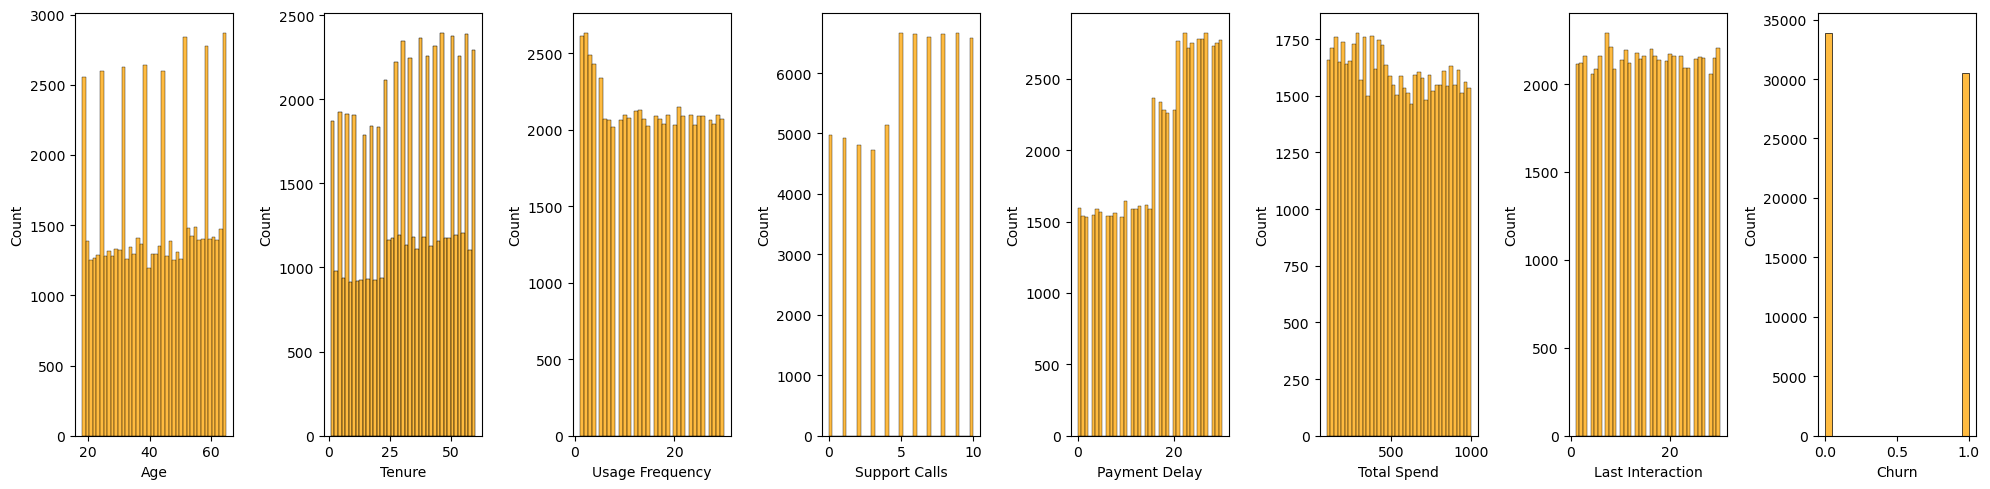

In [60]:
plt.figure(figsize=(20,5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.histplot(x = df[numericals[i]], color = 'orange')
    plt.tight_layout()

Findings:
- Payment Delay and Support calls show a left skewed distribution
- Usage frequency and total spend show a right skewed distribution

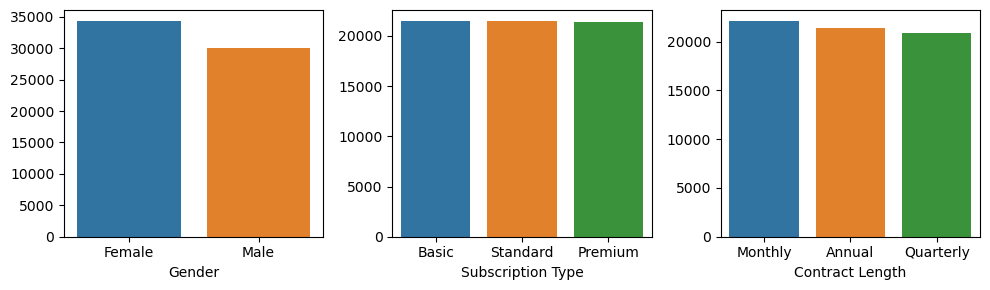

In [57]:
categoricals = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(10,3))
for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    sns.countplot(x = df[categoricals[i]])
    plt.ylabel('')
    plt.tight_layout()

Findings:
- Female customer recorded more in the dataset than male customer
- Subscription type categories distributed almost equally
- Monthly payment is the most popular payment type, even though the distribution is almost equal across other payment option

## Bivariate Analysis

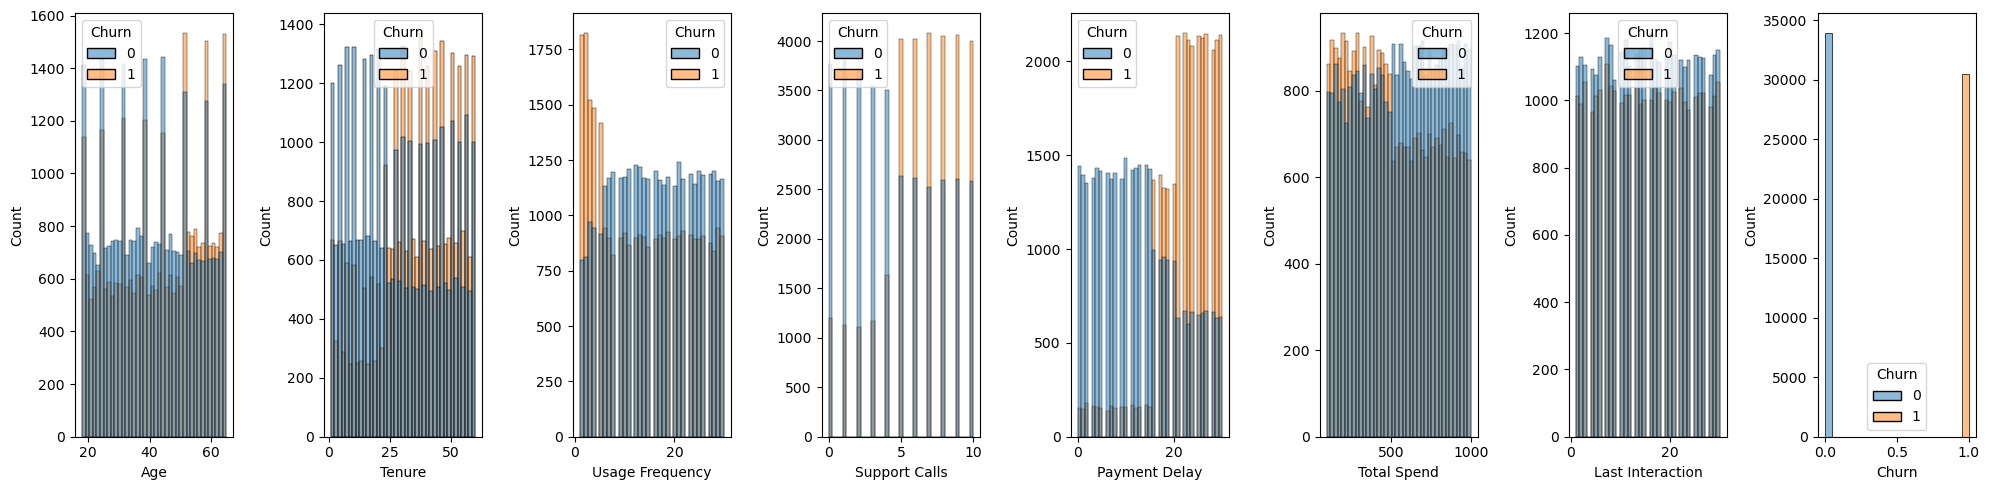

In [74]:
plt.figure(figsize=(20,5))
for i in range(0, len(numericals)):
    plt.subplot(1, len(numericals), i+1)
    sns.histplot(data = df, x = numericals[i], hue = 'Churn')
    plt.tight_layout()

Findings:
- Customer with delayed payment has higher likelihood to churn
- Low usage frequency may indicate higher likelihood of churn

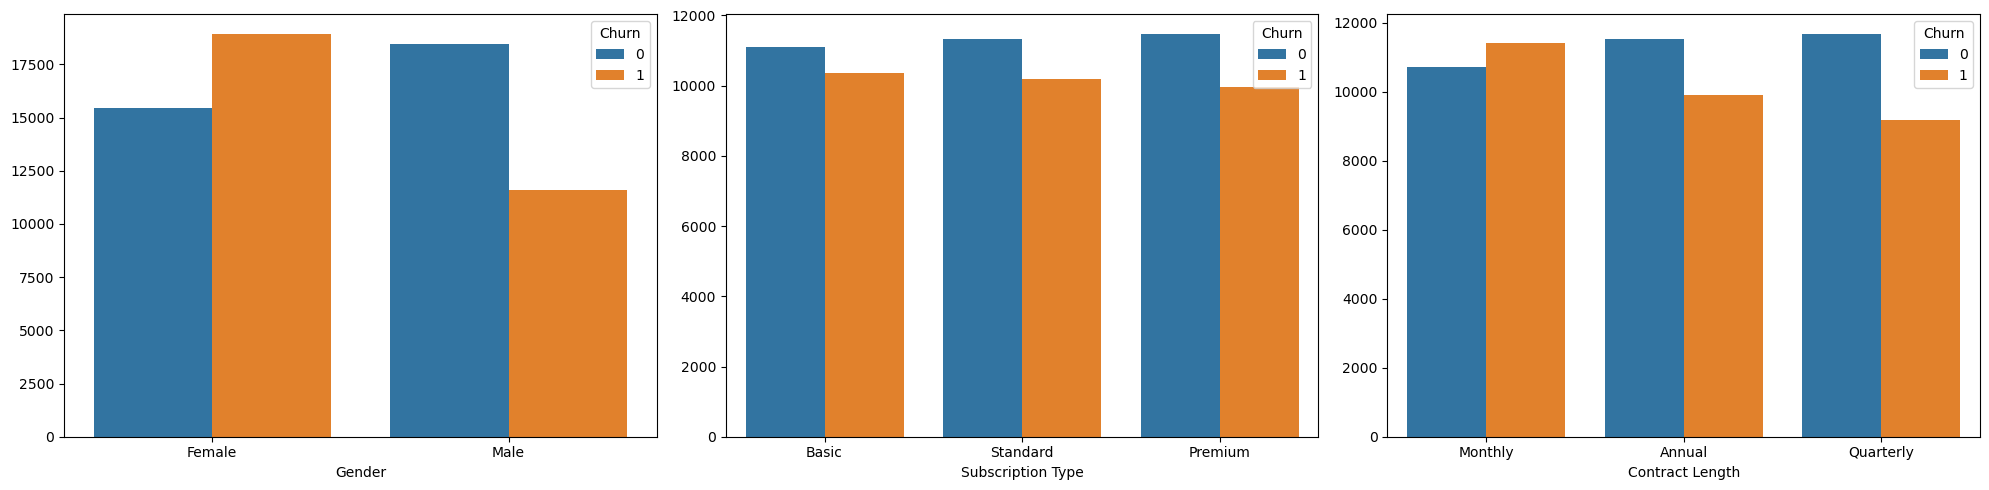

In [65]:
categoricals = ['Gender', 'Subscription Type', 'Contract Length']

plt.figure(figsize=(20,5))
for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    sns.countplot(x = df[categoricals[i]], hue = df['Churn'])
    plt.ylabel('')
    plt.tight_layout()

Findings:
- Female customer more likely to churn than male customer
- All subscription type has almost equal likelihood to churn
- Monthly contract length has the highest likelihood to churn, while quarterly contract length has the least

<AxesSubplot:>

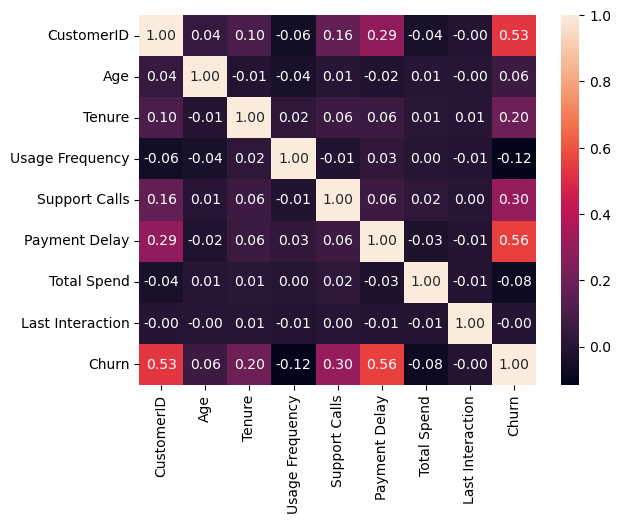

In [76]:
correlation = df.corr()
sns.heatmap(correlation, annot = True, fmt = '.2f')

Findings:
- There's a high correlation between Payment delay and Churn

## Overall Summary

- The data has no null values and duplicated values
- The data has almost equal distribution on each variable
- From the barchart shown that female customer has higher tendency to churn than male customer
- From the bivariate and correlation analysis shown that payment delay and churn has stronger positive correlation than other variables